# Introduction to Cross-Validation

## Introduction

You learned about train-test split before, but also noticed that running the model with a different split for train and test can lead to significantly different results. This is one of the many reasons why you'll want to consider cross-validation!

## Objectives
You will be able to:
* Perform cross validation on a model to determine optimal model performance

## The problem with train-test split

When using train-test split, random samples of data are created for the training and the test set. The problem with this is that the training and test MSE strongly depend on how the training and test sets were created. Let's see how this happens in practice using the auto-mpg data.

Let's copy our pre-processed auto-mpg data again: 

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('auto-mpg.csv') 
data['horsepower'].astype(str).astype(int)

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [7]:
data = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
y = data[['mpg']]
X = data.drop(['mpg'], axis=1)

The code below repeats a train-test split creation 20 times, using a `test_size` of 0.33. So what happens is, each time a new (random) train-test split is created. See how training and testing MSEs swing around by just taking another sample!

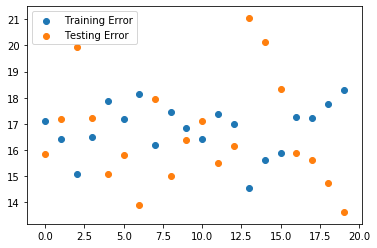

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In order to deal with the issues that random sampling can introduce into interpreting the quality of our models, we'll use a more advanced technique called **K-Fold Cross Validation**.

## K-Fold Cross Validation

K-Fold Cross Validation expands on the idea of training and test splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the test set, and all other sections combined as the training set.

We can then average the individual results frome each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

<img src='./images/new_cross-val-graphic.png' width="800">

You can easily do this in scikit-learn using `cross_val_score()`. If you want the mean squared error as an output, you need to set the `scoring` argument to `'neg_mean_squared_error'`. Note that this negates your mean squared error, so larger means better!

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [5]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-23.596544256046393
-19.890397451640176
-18.933776116374894


There are many ways to perform cross-validation, and we strongly recommend you have a look at the [Cross-validation documentation in Scikit-Learn](http://scikit-learn.org/stable/modules/cross_validation.html). 

## Summary 

Well done! In this lesson you learned how cross-validation can overcome the limitations of train-test split. In the next lesson, you will implement cross-validation on the Boston Housing data. 